In [1]:
import tensorflow as tf
import os

# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

In [3]:
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [4]:
def shape_img(img_param):
    max_dim = 512
    shape = tf.cast(tf.shape(img_param)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img_param, new_shape)
    img = img[tf.newaxis, :]
    return img

In [5]:
def load_img(path_to_img):
    print(path_to_img)
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=[200, 200]) #preserve_aspect_ratio=True)

    print(img.shape)
    return shape_img(img)

In [6]:
#content_path = tf.keras.utils.get_file('Rapperswil_-_Hafen_IMG_0963.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Rapperswil_-_Hafen_IMG_0963.JPG/1599px-Rapperswil_-_Hafen_IMG_0963.JPG')
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
content_image = load_img(content_path)
content_image.shape

/Users/nico/.keras/datasets/YellowLabradorLooking_new.jpg
(200, 200, 3)


TensorShape([1, 512, 512, 3])

In [7]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

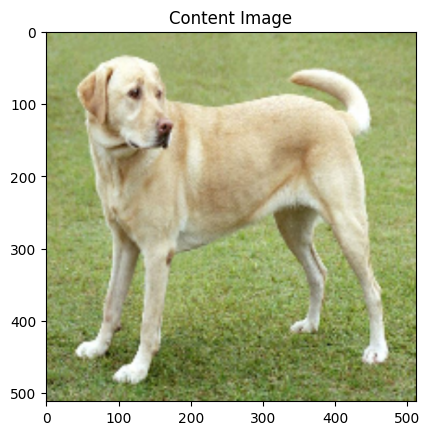

In [8]:
imshow(content_image, "Content Image")

In [9]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [16]:
style_images = []
with os.scandir('pablo_app/static/images/original/Pablo_Picasso') as img_dir:
    for entry in img_dir:
        if entry.name.endswith(".jpg") and entry.is_file():
            style_images.append(entry.path)

from sklearn.utils import shuffle
style_images = shuffle(style_images, random_state=0)

In [ ]:
num_rows = 6
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(20, 10))

i = 0
for style_image_path in style_images[:num_images]:
    style_image = load_img(style_image_path)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    imshow(style_image)
    plt.axis("off")

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    imshow(stylized_image)
    plt.axis("off")

    i += 1
    print(i)

plt.subplots_adjust(wspace=-0.67, hspace=0)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()
print("Done")

pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_323.jpg
(200, 200, 3)
1
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_366.jpg
(200, 200, 3)
2
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_270.jpg
(200, 200, 3)
3
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_314.jpg
(200, 200, 3)
4
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_386.jpg
(200, 200, 3)
5
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_50.jpg
(200, 200, 3)
6
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_286.jpg
(200, 200, 3)
7
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_299.jpg
(200, 200, 3)
8
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_111.jpg
(200, 200, 3)
9
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_16.jpg
(200, 200, 3)
10
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_385.jpg
(200, 200, 3)
11
pablo_app/static/images/original/Pablo_Picasso/Pablo_Picasso_280.